In [2]:
import tensorflow as tf

### 1. Loading MNIST DATASET which is present in the Keras library

In [3]:
from tensorflow.keras.datasets import mnist 

#### Load dataset and split train test sets 

(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [4]:
#### Determine Shapes 
print("Training X Shape: ", train_x.shape)
print("Training Y Shape: ", train_y.shape)
print("Testing X Shape: ", test_x.shape)
print("Testing Y Shape: ", test_y.shape)

Training X Shape:  (60000, 28, 28)
Training Y Shape:  (60000,)
Testing X Shape:  (10000, 28, 28)
Testing Y Shape:  (10000,)


#### Thus Our Training Set has 60000 examples, and Test Set has 10,000 examples with images of 28x28 pixels

### 2. EXAMINE THE DATASET AND OUTPUT LABEL

Y:  8
List Of Probable Outputs:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


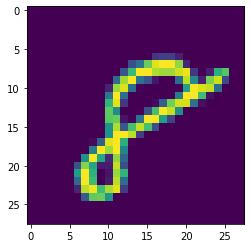

In [5]:
## Examine Input 
import matplotlib.pyplot as plt 

plt.imshow(train_x[59999])
plt.show 

## Examine Output 
print('Y: ', train_y[59999])

### Print all Probable Outputs 
print('List Of Probable Outputs: ', set(train_y))

### 3. ENCODE USING ONE HOT ENCODING

#### This transforms a label to an array of 10 numbers where index of the corresponding value is labelled as '1' while the others are all '0'

In [6]:
from tensorflow.keras.utils import to_categorical 

### encode output labels for both train and test sets 
encoded_y_train = to_categorical(train_y)
encoded_y_test = to_categorical(test_y)

### print out the shape, it changes from (60000,) to (60000, 10)
print('encoded_y_train shape: ',  encoded_y_train.shape)
print('encoded_y_test shape: ',  encoded_y_test.shape)

encoded_y_train shape:  (60000, 10)
encoded_y_test shape:  (10000, 10)


### 4. VECTORISE using numpy reshape into a desired shape

In [7]:
import numpy as np 

x_train_reshaped = np.reshape(train_x, (60000, 784))
x_test_reshaped = np.reshape(test_x, (10000, 784))

print('x_train_reshaped: ', x_train_reshaped.shape,'\nx_test_reshaped: ', x_test_reshaped.shape)

x_train_reshaped:  (60000, 784) 
x_test_reshaped:  (10000, 784)


### 5. NORMALISE 
#### to make it easier for us to compute values

In [8]:
x_mean = np.mean(x_train_reshaped) 
x_std = np.std(x_train_reshaped)

epsilon = 1e-10 

x_train_norm = (x_train_reshaped - x_mean) / (x_std + epsilon)
x_test_norm = (x_test_reshaped - x_mean) / (x_std + epsilon)

In [9]:
x_train_norm

array([[-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
        -0.42407389, -0.42407389],
       [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
        -0.42407389, -0.42407389],
       [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
        -0.42407389, -0.42407389],
       ...,
       [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
        -0.42407389, -0.42407389],
       [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
        -0.42407389, -0.42407389],
       [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
        -0.42407389, -0.42407389]])

### 5. CREATE A RELEVANT MODEL

#### ARCHITECTURE: 

- 2 HIDDEN LAYERS
- 128 NODES PER LAYER 
- 10 NODES (10 OUTPUTS) 

In [10]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 

#### Dense Layered neural network with 2 hidden layers of 128 nodes, and an output layer of 10 nodes
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (784,)),
    Dense(128, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

### 6. Compile and Fit the model 

In [11]:
###### Using categorical cross entropy loss function, and adam optimiser algorithm 

model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = 'accuracy')

model.fit(x_train_norm, encoded_y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2203 - accuracy: 0.9335
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1017 - accuracy: 0.9685
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0772 - accuracy: 0.9753
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0587 - accuracy: 0.9814
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0484 - accuracy: 0.9840


### 7. Examine the model's accuracy to see how the model works on the test set 

In [15]:
loss, accuracy = model.evaluate(x_test_norm, encoded_y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0875 - accuracy: 0.9770


### 8. Final Step: Visualise the predicted values in a batch of 25

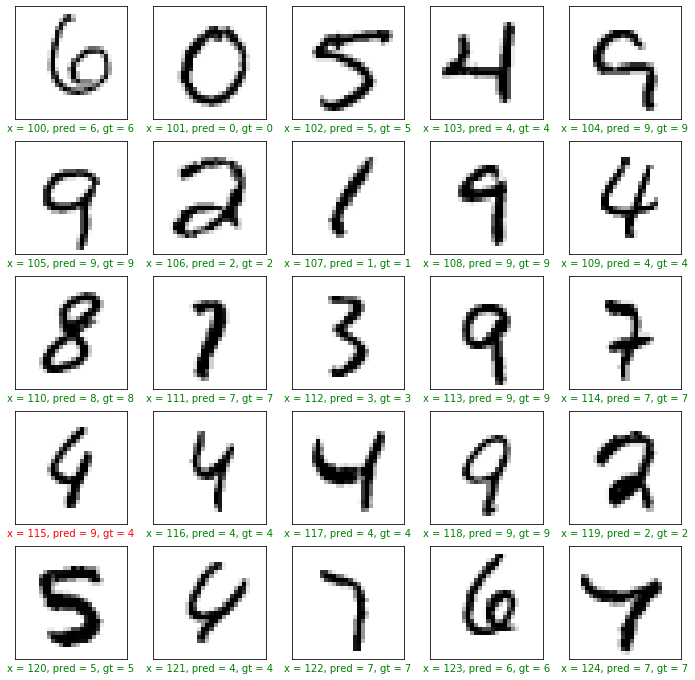

In [16]:
preds = model.predict(x_test_norm)

plt.figure(figsize = (12, 12))

start = 100
for i in range(25): 
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start+i])
    gt = test_y[start + i]
    
    col = 'g'
    if pred != gt: 
        col = 'r'
        
    plt.xlabel('x = {}, pred = {}, gt = {}'.format(start+i, pred, gt), color = col)
    plt.imshow(test_x[start+i], cmap = 'binary')
plt.show()